In [121]:
#comparing Linear vs. KNN regressions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

In [2]:
#import standard Boston housing dataset

from sklearn.datasets import load_boston
boston = load_boston()
#print(boston['DESCR'])

In [151]:
#create a list and dataframe of all features 
features = boston['feature_names'].tolist()
df = pd.DataFrame(boston['data'],columns=features)

In [159]:
#add price (target variable) to dataframe
price = boston['target']*1000
df['price'] = target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target_price,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22400.0,22400.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20600.0,20600.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23900.0,23900.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22000.0,22000.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11900.0,11900.0


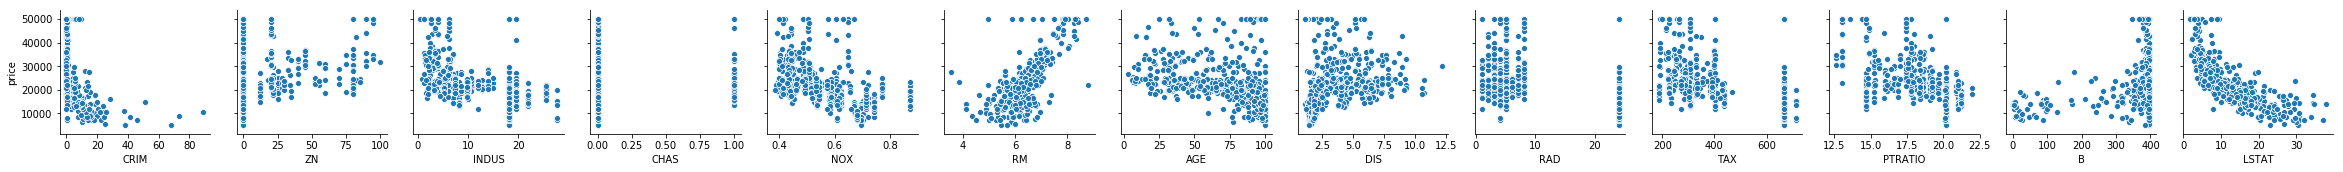

In [160]:
# show relationship between all features and price

pp = sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=features)

In [165]:
#let's compare our regressions on a single variable, LSTAT

X = pd.DataFrame(df.LSTAT)
Y = df.price

In [166]:
#start with knn
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)

knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

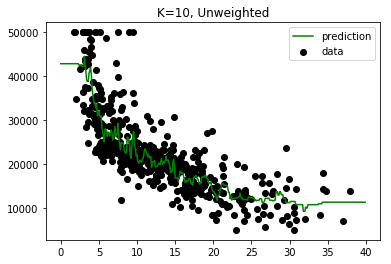

In [167]:
# Set up our prediction line.
T = np.arange(0, 40, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
K_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [163]:
print(knn.score(X, Y))

0.7095408115461863


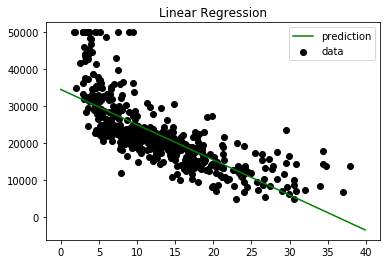

In [168]:
#next LR
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X, Y)

R_ = regr.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, R_, c='g', label='prediction')
plt.legend()
plt.title('Linear Regression')
plt.show()

In [169]:
print(regr.score(X, Y))

0.5441462975864797


# Analysis

The KNN regression outperformed the linear regression (.71 R^2 vs. .54). This was largely due to the fact that we have not transformed our independent variable in any way; in particular, the LSTAT vs. Price curve looks like it could benefit from a logarithmic transformation.

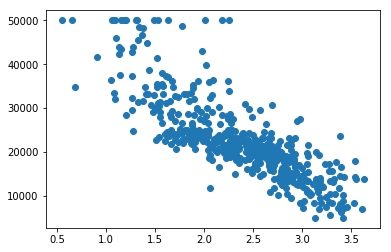

In [210]:
log_lstat = np.log(df['LSTAT'])
df['log_lstat'] = log_lstat
plt.scatter(df.log,df.price)

In [220]:
regr2 = linear_model.LinearRegression()
X = pd.DataFrame(df.log_lstat)
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
print(regr.score(X, Y))

0.6649462248792692
